# Housekeeping

Putting in polarization values calculated from previous notebooks, not calculating individually inside this notebook

# Setup code

adding in the same code from always

In [57]:
# Import Packages
import Pkg

Pkg.add("Plots")
Pkg.add("LsqFit")
Pkg.add("DelimitedFiles")
Pkg.add("PlotlyJS")  # optional if you later want interactive plots
Pkg.add("LaTeXStrings")

   Resolving package versions...
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Project.toml`
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Project.toml`
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Project.toml`
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Project.toml`
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Project.toml`
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Manifest.toml`


this shouldnt be needed for this notebook but in case it is needed later

In [58]:
using Plots,DelimitedFiles,LsqFit,LaTeXStrings

include("../src/PhotoPeakFit.jl");

default(framestyle=:box,
        mc=:black,
        grid=false,
        guidefont=14,
        tickfont=12,
        lc=:navy,
        xlabel="Eᵧ (internal)",
        ylabel="counts")

In [59]:
kliterature = [564.79,
               586.01,
               2013.45]

3-element Vector{Float64}:
  564.79
  586.01
 2013.45

## Import Eu152 Efficiency Calibration Data

Also shouldn't be needed for this but in case it is, it's here

In [60]:
# Fit function is of the form 50^(p[1]+p[2]*log10(e)+p[3]*log10(e)^2)
io = open("../calibrations/Eu152-efficiency-cal_debug.csv", "r")
clover_eff_params = readdlm(io, ',', Float64, '\n', comments=true, comment_char='#')
close(io)

c0_eff_fit, c1_eff_fit, c2_eff_fit = clover_eff_params[1,:],clover_eff_params[2,:],clover_eff_params[3,:]

c0_eff_params,c1_eff_params,c2_eff_params = [c0_eff_fit[1],c0_eff_fit[3],c0_eff_fit[5]],
                                            [c1_eff_fit[1],c1_eff_fit[3],c1_eff_fit[5]],
                                            [c2_eff_fit[1],c2_eff_fit[3],c2_eff_fit[5]]

c0_σeff,c1_σeff,c2_σeff = [c0_eff_fit[2],c0_eff_fit[4],c0_eff_fit[6]], 
                          [c1_eff_fit[2],c1_eff_fit[4],c1_eff_fit[6]],
                          [c2_eff_fit[2],c2_eff_fit[4],c2_eff_fit[6]]

([0.04994475356378319, 0.03881764706440051, 0.0074349631904078745], [0.058397370815562344, 0.04589348487849286, 0.008923473979328399], [0.046981088183109074, 0.03611056774624827, 0.006851762049610171])

# Previous Polarization Values
values from rough_calc and rough_calc_02 notebooks

In [61]:
P_minus = -0.06307485350766012
# Came out to be negative because it's in the opposite direction, does this need to be included or excluded in these measurements
P_σminus = -0.00407867985046742



P_plus = 0.057859531833656414
P_σplus = 0.0025698809474215562

0.0025698809474215562

# Calculation Scheme

coming post GitHub upload

# 565 KeV

A = +1/3 from previous notebook

In [6]:
A = 1/3

N_plus = (1 .+ (A .* P_plus)) ./ (1 .- (A .* P_plus))
N_minus = (1 .+ (A .* P_minus)) ./ (1 .- (A .* P_minus))

err_N_plus = N_plus .* ((((P_σplus ./ P_plus) .^2) .+ ((P_σplus ./ P_plus) .^ 2)) .^ 0.5)
err_N_minus = N_minus .* ((((P_σminus ./ P_minus) .^2) .+ ((P_σminus ./ P_minus) .^ 2)) .^ 0.5)

R = N_plus ./ N_minus
err_R = R .* ((((err_N_minus ./ N_minus) .^ 2) .+ ((err_N_plus ./ N_plus) .^ 2)) .^ 0.5)

AP_565 = ((R .^ 0.5) .- 1) ./ ((R .^ 0.5) .+ 1)

err_AP(AP, V, σV) = AP .* ((2 .* ((σV ./ V) .^ 2)) .^ 0.5)

error_565 = err_AP(AP_565, R, err_R)

0.0031623889242642263

# 586 KeV

A = -2/3 from previous notebook

In [7]:
A = -2/3

N_plus = (1 .+ (A .* P_plus)) ./ (1 .- (A .* P_plus))
N_minus = (1 .+ (A .* P_minus)) ./ (1 .- (A .* P_minus))

err_N_plus = N_plus .* ((((P_σplus ./ P_plus) .^2) .+ ((P_σplus ./ P_plus) .^ 2)) .^ 0.5)
err_N_minus = N_minus .* ((((P_σminus ./ P_minus) .^2) .+ ((P_σminus ./ P_minus) .^ 2)) .^ 0.5)

R = N_plus ./ N_minus
err_R = R .* ((((err_N_minus ./ N_minus) .^ 2) .+ ((err_N_plus ./ N_plus) .^ 2)) .^ 0.5)

AP_586 = ((R .^ 0.5) .- 1) ./ ((R .^ 0.5) .+ 1)

err_AP(AP, V, σV) = AP .* ((2 .* ((σV ./ V) .^ 2)) .^ 0.5)

error_586 = err_AP(AP_586, R, err_R)

-0.006324792213683763

# Plot

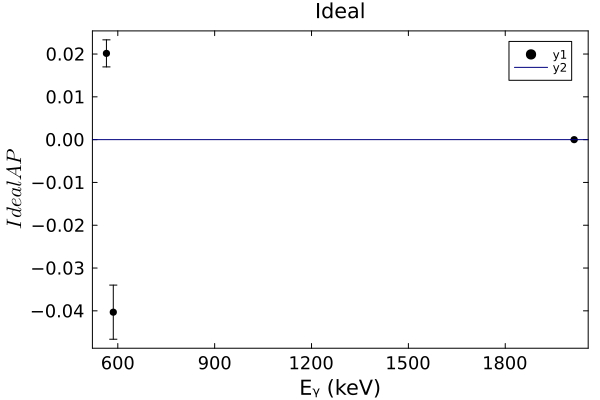

In [8]:
beta = [AP_565, AP_586, 0]
err_beta = [error_565, error_586, 0]

q = scatter(kliterature, beta, yerr=err_beta,
    xlabel = "Eᵧ (keV)",
    ylabel = L"Ideal AP",
    title = "Ideal"
)
hline!([0])

# AP Reverse

Assuming AP nees to equal -0.1, solving for the necessary polarization in different states

$$ AP = \frac{\sqrt{R} -1}{\sqrt{R} +1} $$

$$R = \frac{(1+ A*P)/(1-A*P)}{(1-A*P)/(1+A*P)}$$
P = absolute value of P (will have opposite signs top and bottom, this equation accounts fro that)


First solving for R

<img src="../images/R_val.png" alt="Drawing" style="width: 300px;"/>


Then solving for P (Top equation is the only valid one)

<img src="../images/P_val.png" alt="Drawing" style="width: 300px;"/>

In [50]:
AP = -0.1
R_m(AP) = ((AP .+ 1) .^ 2) ./ ((AP .- 1) .^ 2)

R = R_m(AP)
# Value that R has to be for ALL spins

P_val_plus(A, R) = (((R).^0.5) .- 1) ./ (A .* (((R).^0.5) .+ 1))

# This is the other solution to the equation above, but always gives impossible answers
# P_val_minus(A, R) = (((R).^0.5) .+ 1) ./ (A .* (((R).^0.5) .- 1))

P_val_plus (generic function with 1 method)

## 49K

### A = +1/3

here solving R for whatever P using whatever spin

In [51]:
A = +1/3

P_plus = P_val_plus(A, R)
println(P_plus)
#P_minus = P_val_minus(A, R)

-0.29999999999999993


### A = -2/3

In [52]:
A = -2/3

P_plus = P_val_plus(A, R)
println(P_plus)
# P_minus = P_val_minus(A, R)


0.14999999999999997


not exacly sure how/if this needs to be plotted. can be vs energy, spins, etc.

## 51K example

In [54]:
# For AP = 0.025
AP = 0.025

R = R_m(AP)


A = 1/3
P = P_val_plus(A, R) 
println(P)

A = -2/3
P = P_val_plus(A, R)
println(P)

0.07500000000000007
-0.03750000000000003


In [55]:
# for AP = -0.05

AP = -0.05

R = R_m(AP)


A = 1/3
P = P_val_plus(A, R) 
println(P)

A = -2/3
P = P_val_plus(A, R)
println(P)

-0.15
0.075


# Integral calcs

detectors are located 2.7cm away from the source and are 5cm wide, creating a half angle of about 43 degrees with the source. This coordinates to $\pm$ 0.07469 rads wherever we're focusing.

$$\int 1+AP\sin(\theta) d\theta$$ 
this corresponds to the Plus values below

$$\int 1 - AP\cos(\theta) d\theta$$
this corresponds to the Minus values below

For the case of the full detector. The integrals are solved and evaluated around $0\pm 43\degree$ (front) and around $180\pm 43\degree$ as so:

Plus: $$ front = \theta - AP \cos(\theta) |^{0.7469}_{0.7469}$$ $$ back =\theta - AP \cos(\theta) |^{3.8885}_{2.3946}$$

Minus: $$ front=\theta - AP \sin(\theta) |^{0.7469}_{0.7469}$$ $$ back = \theta - AP \sin(\theta) |^{3.8885}_{2.3946}$$

All values are converted into radians for calculations 



There is also the case of a 1mm hole being cut out of the center of the detector. This corresponds to a half angle of $1.06 \degree$ that needs to be taken out of the equation. This was done by repeating to process above around $0 \pm 1.06 \degree $ and $ 180 \pm 1.06 \degree$ and subtracting this value to the corresponding full detector value.

The final integral considering the holes were evaluated as so:


Plus: $$ front = [\theta - AP \cos(\theta) |^{0.7469}_{-0.7469}] - [\theta - AP \cos(\theta) |^{0.0185}_{-0.0185}]$$ 
$$ back =[\theta - AP \cos(\theta) |^{3.8885}_{2.3946}] - [\theta - AP \cos(\theta) |^{3.1601}_{3.1231}]$$

Minus: $$ front=[\theta - AP \sin(\theta) |^{0.7469}_{-0.7469}] - [\theta - AP \sin(\theta) |^{0.0185}_{-0.0185}]$$
$$ back =[\theta - AP \sin(\theta) |^{3.8885}_{2.3946}] - [\theta - AP \sin(\theta) |^{3.1601}_{3.1231}]$$


Then the following Ratio was calculated for the full detector and taking the hole into account

$$ R = \frac{Plus_{front}/Plus_{back}}{Minus_{front}/Minus_{back}}$$


In [88]:
# Positive integral

plus(theta1, theta2, A, P) = (theta2 .- (A .* P .* cos(theta2))) .- (theta1 - (A .* P .* cos(theta1)))
front_p = plus(-0.7469, 0.7469, 1 ./ 3, 1)
back_p = plus(2.3946, 3.8885, 1 ./ 3, 1)

# Negative integral

minus(theta1, theta2, A, P) = (theta2 .- (A .* P .* sin(theta2))) .- (theta1 - (A .* P .* sin(theta1)))
front_m = minus(-0.7469, 0.7469, 1 ./ 3, 1)
back_m = minus(2.3946, 3.8885, 1 ./ 3, 1)

1.946835960896935

Different integral subtracting a 1mm hole from the detector

In [97]:
# Smaller integral

front_sp = front_p .- plus(-0.0185, 0.0185)
back_sp = back_p .- plus(3.1231, 3.1601)
println("Integral at 0 degrees = ", front_sp)

front_sm = front_m .- minus(-0.0185, 0.0185)
back_sm = back_m .- minus(3.1231, 3.1601)


Integral at 0 degrees = 1.4567999999999999


1.8975033310657845

In [90]:
# Ratios

Ratio = (front_p ./ back_p) ./ (front_m ./ back_m)
println(Ratio)

sRatio = (front_sp ./ back_sp) ./ (front_sm ./ back_sm)
println(sRatio)

1.8702103738317608
1.8670619597572453


Finding AP Factor from Paper

$$AP = \frac{\sqrt{R} - 1}{\sqrt{R} + 1}$$

In [98]:
AP_val(R) = ((R .^ 0.5) .- 1) ./ ((R .^ 0.5) .+ 1)

AP = AP_val(Ratio)
println(AP)
AP_s = AP_val(sRatio)

0.15524713954626465


0.15483604647761376